In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eyash24","key":"32cc857234360ff177e480532cb3026b"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d atharvadumbre/indian-sign-language-islrtc-referred

 99% 606M/609M [00:13<00:00, 47.5MB/s]
100% 609M/609M [00:13<00:00, 47.2MB/s]


In [ ]:
!mkdir images


In [ ]:
!unzip indian-sign-language-islrtc-referred.zip -d images

Streaming output truncated to the last 5000 lines.
  inflating: images/original_images/V/1.jpg  
  inflating: images/original_images/V/10.jpg  
  inflating: images/original_images/V/100.jpg  
  inflating: images/original_images/V/1000.jpg  
  inflating: images/original_images/V/101.jpg  
  inflating: images/original_images/V/102.jpg  
  inflating: images/original_images/V/103.jpg  
  inflating: images/original_images/V/104.jpg  
  inflating: images/original_images/V/105.jpg  
  inflating: images/original_images/V/106.jpg  
  inflating: images/original_images/V/107.jpg  
  inflating: images/original_images/V/108.jpg  
  inflating: images/original_images/V/109.jpg  
  inflating: images/original_images/V/11.jpg  
  inflating: images/original_images/V/110.jpg  
  inflating: images/original_images/V/111.jpg  
  inflating: images/original_images/V/112.jpg  
  inflating: images/original_images/V/113.jpg  
  inflating: images/original_images/V/114.jpg  
  inflating: images/original_images/V/11

In [ ]:
import os
import shutil

def seperate_data(test_path, train_path, src_path):
    os.makedirs(test_path, exist_ok=True)
    os.makedirs(train_path, exist_ok=True)

    test_files = os.listdir(src_path)[-100:]
    train_files = os.listdir(src_path)[:-100]
    # print(test_files)
    print()
    # print(train_files)

    for filename in test_files:
        dst = os.path.join(test_path)
        src = os.path.join(src_path, filename)
        shutil.move(src, dst)

    for filename in train_files:
        dst = os.path.join(train_path)
        src = os.path.join(src_path, filename)
        shutil.move(src, dst)
    print("complete")


for i in "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ":
  seperate_data("format/test/"+i,"format/train/"+i, "images/original_images/"+i)
  print('complete: '+i)


complete
complete: 0

complete
complete: 1

complete
complete: 2

complete
complete: 3

complete
complete: 4

complete
complete: 5

complete
complete: 6

complete
complete: 7

complete
complete: 8

complete
complete: 9

complete
complete: A

complete
complete: B

complete
complete: C

complete
complete: D

complete
complete: E

complete
complete: F

complete
complete: G

complete
complete: H

complete
complete: I

complete
complete: J

complete
complete: K

complete
complete: L

complete
complete: M

complete
complete: N

complete
complete: O

complete
complete: P

complete
complete: Q

complete
complete: R

complete
complete: S

complete
complete: T

complete
complete: U

complete
complete: V

complete
complete: W

complete
complete: X

complete
complete: Y

complete
complete: Z


In [ ]:
TRAIN_DIR = "format/train"
TEST_DIR = "format/test"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, add, Conv2D, Flatten, Dropout,BatchNormalization ,Activation, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
IMG_HEIGHT = 250
IMG_WIDTH = 250
BS = 64

In [ ]:

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    seed=21,
    subset="training",
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BS,
    color_mode='rgb'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    seed=21,
    subset="validation",
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BS,
    color_mode='rgb'
)


test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    labels='inferred',
    seed=21,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BS,
    color_mode='rgb'
)

Found 32400 files belonging to 36 classes.
Using 25920 files for training.
Found 32400 files belonging to 36 classes.
Using 6480 files for validation.
Found 3600 files belonging to 36 classes.


In [ ]:
class_names = train_ds.class_names
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

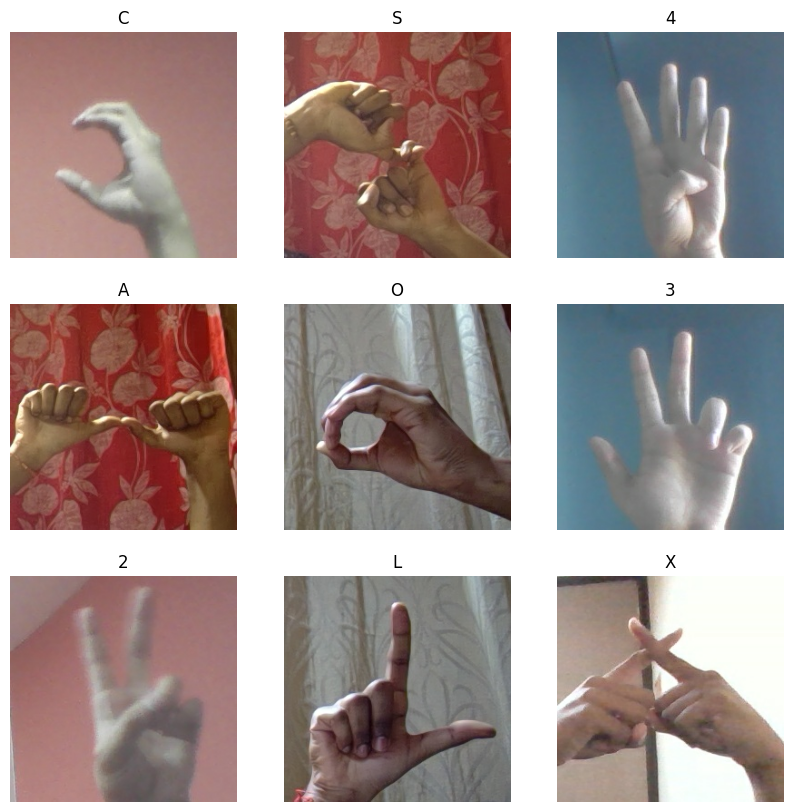

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
#     print(labels)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = [i for i,j in enumerate(labels[i]) if j==1]
        plt.title(class_names[index[0]])
        plt.axis("off")

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,

        rotation_range=5,
        # featurewise_center=False,
        # featurewise_std_normalization=False,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        # brightness_range=[0.2, 0.8],
        fill_mode='nearest')


valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [ ]:
train_ds  = train_datagen.flow_from_directory(directory = 'format/train',
                                                   target_size = (250,250),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 32400 images belonging to 36 classes.


In [ ]:
valid_ds = valid_datagen.flow_from_directory(directory = 'format/test',
                                                  target_size = (250,250),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 720 images belonging to 36 classes.


In [ ]:
test_ds = test_datagen.flow_from_directory(directory = 'format/test',
                                                  target_size = (250,250),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 3600 images belonging to 36 classes.


In [ ]:
def residual_block(X, num_filters: int, stride: int = 1, kernel_size: int = 3,
                   activation: str = 'relu', bn: bool = True, conv_first: bool = True):

    conv_layer = Conv2D(num_filters,
                        kernel_size=kernel_size,
                        strides=stride,
                        padding='same',
                        kernel_regularizer=l2(1e-4))
    # X = input
    if conv_first:
        X = conv_layer(X)
        X = Dense(num_filters,kernel_initializer='he_uniform')(X)
        if bn:
            X = BatchNormalization(axis=1)(X)
        if activation is not None:
            X = Activation(activation)(X)
            X = Dropout(0.2)(X)
    else:
        if bn:
            X = BatchNormalization(axis=1)(X)
        if activation is not None:
            X = Activation(activation)(X)
        X = conv_layer(X)

    return X


def build_custom_resnet(input_shape, num_classes):

    x = base_model.output

    num_filters_in = 158
    num_filters_out = 32
    X = residual_block(X=x, num_filters=num_filters_in, conv_first=True)
    num_res_block = 4

    # Building stack of residual units
    for stage in range(4):
        for unit_res_block in range(num_res_block):
            activation = 'relu'
            bn = True
            stride = 1
            # First layer and first stage
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if unit_res_block == 0:
                    activation = None
                    bn = False
                # First layer but not first stage
            else:
                num_filters_out = num_filters_in * 2
                if unit_res_block == 0:
                    stride = 2

            # bottleneck residual unit
            y = residual_block(X,
                              num_filters=num_filters_in,
                              kernel_size=7,
                              stride=stride,
                              activation=activation,
                              bn=bn,
                              conv_first=False)
            y = residual_block(y,
                              num_filters=num_filters_in,
                              conv_first=False)
            y = residual_block(y,
                              num_filters=num_filters_out,
                              kernel_size=1,
                              conv_first=False)
            if unit_res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                X = residual_block(X=X,
                                  num_filters=num_filters_out,
                                  kernel_size=7,
                                  stride=stride,
                                  activation=activation,
                                  bn=False)
            X = tf.keras.layers.add([X, y])

    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    return model

# # Example usage:
# input_shape = (43, 43, 3)  # Input shape for the ResNet50 base model
# num_classes = 7  # Number of classes in your dataset
# model = build_custom_resnet(input_shape, num_classes)
# model.summary()




In [ ]:
def build_custom_resnet(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(input_shape=(250,250,3),include_top=False,weights="imagenet")

    # Freezing Layers

    for layer in base_model.layers:
        layer.trainable=True

    X = base_model.output

    num_filters_in = 158
    num_filters_out = 32
    X = Dropout(0.5)(X)
    # X = Flatten()(X)
    x = BatchNormalization(axis=1)(X)
    X = residual_block(X=X, num_filters=num_filters_in, conv_first=True)
    num_res_block = 4

    # Building stack of residual units
    for stage in range(4):
        for unit_res_block in range(num_res_block):
            activation = 'relu'
            bn = True
            stride = 1
            # First layer and first stage
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if unit_res_block == 0:
                    activation = None
                    bn = False
            # First layer but not first stage
            else:
                num_filters_out = num_filters_in * 2
                if unit_res_block == 0:
                    stride = 2

            # bottleneck residual unit
            y = residual_block(X,
                               num_filters=num_filters_in,
                               kernel_size=1,
                               stride=stride,
                               activation=activation,
                               bn=bn,
                               conv_first=False)
            y = Dropout(0.5)(y)
            y = residual_block(y, num_filters=num_filters_in, conv_first=False)
            y = Dropout(0.5)(y)
            y = residual_block(y,
                               num_filters=num_filters_out,
                               kernel_size=1,
                               conv_first=False)
            y = Dropout(0.5)(y)
            if unit_res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                X = residual_block(X=X,
                                   num_filters=num_filters_out,
                                   kernel_size=1,
                                   stride=stride,
                                   activation=None,
                                   bn=False)
            X = add([X, y])

    X = GlobalMaxPooling2D()(X)
    # x = tf.keras.layers.Dense(units=4096, activation='relu')(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    # x = tf.keras.layers.Dropout(0.5)(x)
    # X = Dense(2048, activation='relu')(X)
    # x = tf.keras.layers.BatchNormalization()(x)
    # X = Dropout(0.5)(X)
    X = Dense(1024, activation='relu')(X)
    x = tf.keras.layers.BatchNormalization()(x)
    X = Dropout(0.5)(X)
    predictions = Dense(num_classes, activation='softmax')(X)
    model = Model(inputs=base_model.input, outputs=predictions)

    return model


In [ ]:
# Building Model
model = build_custom_resnet(input_shape=(250, 250, 1), num_classes=36)


In [ ]:
# # Model Summary

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 256, 256, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 125, 125, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 125, 125, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image
# plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
# Image(filename='convnet.png')

In [ ]:
import keras
@keras.saving.register_keras_serializable()
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)


optim = tf.keras.optimizers.legacy.Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#optim = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = tf.keras.optimizers.legacy.SGD(lr=1e-6, momentum=0.9, decay=1e-8, nesterov=True)
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',mode='max',factor=0.5, patience=10, min_lr=0.000001, verbose=1)

mcp = ModelCheckpoint('model.keras')

early_stop = EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True,
)


In [ ]:
# compiling model
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=METRICS, run_eagerly=True)

In [ ]:
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs = 10,
    verbose = 1,
    callbacks=[rlrop,mcp,early_stop]
  )

Epoch 1/10
507/507 [==============================] - 776s 2s/step - loss: 10.3296 - accuracy: 0.0279 - precision: 0.0292 - recall: 0.0188 - auc: 0.5000 - f1_score: 0.0229 - val_loss: 5.1102 - val_accuracy: 0.0167 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5277 - val_f1_score: 0.0000e+00 - lr: 1.0000e-06
Epoch 2/10
507/507 [==============================] - 773s 2s/step - loss: 9.6226 - accuracy: 0.0275 - precision: 0.0265 - recall: 0.0155 - auc: 0.5009 - f1_score: 0.0195 - val_loss: 4.7672 - val_accuracy: 0.0278 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5095 - val_f1_score: 0.0000e+00 - lr: 1.0000e-06
Epoch 3/10
507/507 [==============================] - 779s 2s/step - loss: 9.1448 - accuracy: 0.0276 - precision: 0.0280 - recall: 0.0151 - auc: 0.5002 - f1_score: 0.0196 - val_loss: 4.7463 - val_accuracy: 0.0361 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5177 - val_f1_score: 0.0000e+00 - lr: 1.0000e-06
Epoch 4/10
213/

In [ ]:
import pickle
f = open('model.pickle', 'wb')
pickle.dump({'model': model}, f)
f.close()

In [ ]:
model_dict = pickle.load(open('./model.pickle', 'rb'))
model2 = model_dict['model']


In [ ]:
model.save('model.h5')
model.save('model.keras')

In [ ]:
model2.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history_2 = model2.fit(
    train_ds,
    validation_data=valid_ds,
    epochs = 20,
    verbose = 1,
    callbacks=[lrd,mcp,early_stop]
  )

In [ ]:
import pickle
f = open('model2.pickle', 'wb')
pickle.dump({'model2': model}, f)
f.close()

In [ ]:
print('\n# Evaluate on val data')
results_val = model2.evaluate(valid_ds)
print('val loss, val acc:', results_val)

In [ ]:
print('\n# Evaluate on test data')
results_test = model2.evaluate(test_ds)
print('test loss, test acc:', results_test)

In [ ]:
epoch_str = '-EPOCHS_' + str(50)
test_acc = 'test_acc_%.3f' % results_test[1]
# model.save('RESNET50' + epoch_str + test_acc + '.keras')

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):

    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])

    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()


Train_Val_Plot(history_2.history['accuracy'],history_2.history['val_accuracy'],
               history_2.history['loss'],history_2.history['val_loss'],
               history_2.history['auc'],history_2.history['val_auc'],
               history_2.history['precision'],history_2.history['val_precision'],
               history_2.history['f1_score'],history_2.history['val_f1_score']
              )